<a href="https://colab.research.google.com/github/StephanieJax/MachineLearning_5/blob/main/CS4347_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 5 - INTRO TO MACHINE LEARNING | Model Selection, Model Regularization, Decision Tree, Bagging, Random Forest and Boosting


> **FULL MARKS = 100**



**Note:** To submit the assignment, please follow the same steps and in assignments 1, 2, 3, 4. 

In this assignment we will cover the following topics:

1. **Model Selection | SCORE : 20**
  
  **1.1 Subset Feature Selection**
      
    References
    > https://archive.ics.uci.edu/ml/datasets/Online+Video+Characteristics+and+Transcoding+Time+Dataset#

  **1.2 Forward stepwise feature selection**
      
    References
    > Please follow lecture ntoes

2. **Model Regularization | SCORE : 20**
  
  **2.1 Ridge Regression - L2 Regularization**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

  **2.2 Lasso Regression - L1 Regularization**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

3. **Decision Tree with KFold Cross Validation| SCORE : 30**
      
    References

    > https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

    > https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
      
    > https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


4. **Decision Tree with Bagging | SCORE : 10**

    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor

    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier

5. **Random Forest | SCORE : 10**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

6. **Boosting | SCORE : 10**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

    > https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier


### 1. Model Selection
---



---

***EXERCISE NO. 1.1*** **Score : 10** 

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

#Load the data
wine = load_wine()

# Now create a pandas dataframe that uses feature_names as columns and wine data as values
dffeature = pd.DataFrame(data = wine.data, columns = wine.feature_names)
print(dffeature.head())
# Now create a pandas dataframe that uses wine target as data and ['label'] as column
dftarget = pd.DataFrame(data = wine.target, columns = ['label'])
print(dftarget.head())
# Now replace 0 with 0th value of wine.target_names, 1 with 1st value and so on in dftarget
dftarget = dftarget.apply(lambda x:wine.target_names[x])
print(dftarget.head())

# Now concatenate dffeature and dftarget dataframe column wise and create new dataframe df, here pass sort=False
df = pd.concat([dffeature,dftarget],axis = 1, sort = False)

# Print the head of the data
print(df.head())

# Print the tail of the data
print(df.tail())
 

# See if there is na
print(df.isna().sum().sum())

# If there is na remove them
df.dropna(inplace=True)

   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]
   label
0      0
1      0
2      0
3      0
4      0
     label
0  class_0
1  class_0
2  class_0
3  class_0
4  class_0
   alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline    label
0    14.23        1.71  2.43  ...                          3.92   1065.0  class_0
1    13.20        1.78  2.14  ...                          3.40   1050.0  class_0
2    13.16        2.36  2.67  ...                          3.17   1185.0  class_0
3    14.37        1.95  2.50  ...                      

In [ ]:
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Get data and labels X and y
# X is df dataframe drop 'label' column 
X = df.drop(columns = ['label'])
# y is the target of the wine dataset
y = wine.target

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# SubSet model selection method have given for you
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}


In [ ]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()

#Find the best model in each number of predictors of the wine dataset
#Save the best model in models_best.loc[i], i is the number of predictors 
#Note: Maybe you will need to use a for loop to achieve that

# A range of (1,8) is the smallest range needed to fit the graphs in the next segment
for i in range(1,14):
  models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 13 models on 1 predictors in 0.041848182678222656 seconds.
Processed 78 models on 2 predictors in 0.27638983726501465 seconds.
Processed 286 models on 3 predictors in 0.8535184860229492 seconds.
Processed 715 models on 4 predictors in 2.2037665843963623 seconds.
Processed 1287 models on 5 predictors in 3.8509421348571777 seconds.
Processed 1716 models on 6 predictors in 5.042239427566528 seconds.
Processed 1716 models on 7 predictors in 5.182631492614746 seconds.
Processed 1287 models on 8 predictors in 3.7608819007873535 seconds.
Processed 715 models on 9 predictors in 3.4007956981658936 seconds.
Processed 286 models on 10 predictors in 1.2896928787231445 seconds.
Processed 78 models on 11 predictors in 0.35515904426574707 seconds.
Processed 13 models on 12 predictors in 0.06344985961914062 seconds.
Processed 1 models on 13 predictors in 0.012880802154541016 seconds.
Total elapsed time: 26.540024042129517 seconds.


Text(0, 0.5, 'BIC')

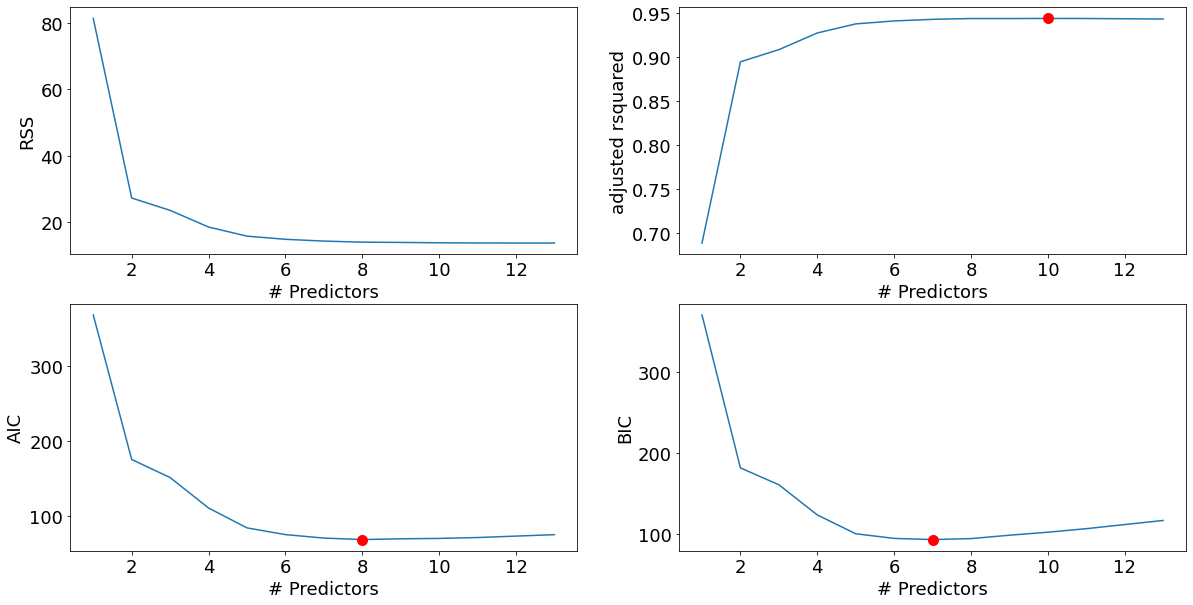

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The idxmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The idxmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [ ]:
#Answer the question: 
'''
1. Based on the plots above, how many predictors will give you the best performer model? 
'''

'''
Your answer goes here: 

8 predictors will give you the best performer model. 


'''

***EXERCISE NO. 1.2*** **Score : 10** 

In [ ]:
#Forward selection
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

#Refer to class example codes
#Get all forward selection models
#Note: You may need a for loop to achieve that

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 1 predictors in 0.04745292663574219 seconds.
Processed  12 models on 2 predictors in 0.04504990577697754 seconds.
Processed  11 models on 3 predictors in 0.03949093818664551 seconds.
Processed  10 models on 4 predictors in 0.04233956336975098 seconds.
Processed  9 models on 5 predictors in 0.03291797637939453 seconds.
Processed  8 models on 6 predictors in 0.04106593132019043 seconds.
Processed  7 models on 7 predictors in 0.04317164421081543 seconds.
Processed  6 models on 8 predictors in 0.02268052101135254 seconds.
Processed  5 models on 9 predictors in 0.02737879753112793 seconds.
Processed  4 models on 10 predictors in 0.02382206916809082 seconds.
Processed  3 models on 11 predictors in 0.02025318145751953 seconds.
Processed  2 models on 12 predictors in 0.015029430389404297 seconds.
Processed  1 models on 13 predictors in 0.006676197052001953 seconds.
Total elapsed time: 0.4969635009765625 seconds.


In [ ]:
# print the best number of predictors you find in subset model selection
# print the same number of predictors you find in forward model selection


print(models_best.loc[8, "model"].summary())
print(models_fwd.loc[8, "model"].summary())

#Answer the question:

'''
Are these models' features identical?

''' 

'''
Your answer goes here: 

No.

'''

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              376.5
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                   6.72e-104
Time:                        01:29:27   Log-Likelihood:                         -26.590
No. Observations:                 178   AIC:                                      69.18
Df Residuals:                     170   BIC:                                      94.63
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

'\nYour answer goes here: \n\nNo\n\n'

### 2. Model Regularization 
---



---

***EXERCISE NO. 2.1*** **Score : 10** 

In [ ]:
#Ridge regression  
#We use the wine data to predict a wine's class 
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

#print df head
print(df.head())

#Get data and labels X and y
# X is df dataframe drop 'label' column, axis=1
X = df.drop(columns = ['label'], axis = 1)
# y is the target of the wine dataset
y = wine.target

   alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline    label
0    14.23        1.71  2.43  ...                          3.92   1065.0  class_0
1    13.20        1.78  2.14  ...                          3.40   1050.0  class_0
2    13.16        2.36  2.67  ...                          3.17   1185.0  class_0
3    14.37        1.95  2.50  ...                          3.45   1480.0  class_0
4    13.24        2.59  2.87  ...                          2.93    735.0  class_0

[5 rows x 14 columns]


In [ ]:
# generate an array of alpha values ranging from very big to very small
# NOTE: here alpha means the lambda mentioned in class
# Associated with each alpha value is a vector of ridge regression coefficients, which we'll
# store in a matrix coefs. In this case, it is a 100 * 13
# matrix, with 13 cols (one for each predictor) and 100
# rows (one for each value of alpha).

alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)  

(100, 13)

In [ ]:
# Split data into training and test sets 
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
# We fit a ridge regression model on the training set, and evaluate
# its MSE on the test set, pass alpha = 4, normalize = True to Ridge():
ridge2 = Ridge(alpha = 4,normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
mse = mean_squared_error(y_test, pred2)          # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

alcohol                        -0.040578
malic_acid                      0.038192
ash                            -0.026995
alcalinity_of_ash               0.014080
magnesium                      -0.000702
total_phenols                  -0.107779
flavanoids                     -0.085737
nonflavanoid_phenols            0.308744
proanthocyanins                -0.088442
color_intensity                 0.011403
hue                            -0.252242
od280/od315_of_diluted_wines   -0.110255
proline                        -0.000210
dtype: float64
Test mean squared error (MSE): 0.20


In [ ]:
#Pass alpha = 10**10 to Ridge() and do the similar process like the previous cell
ridge3 = Ridge(alpha = 10**10,normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
mse = mean_squared_error(y_test, pred2)          # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

alcohol                        -3.703259e-11
malic_acid                      3.555099e-11
ash                             5.874964e-13
alcalinity_of_ash               1.386774e-11
magnesium                      -1.064071e-12
total_phenols                  -1.015540e-10
flavanoids                     -7.471098e-11
nonflavanoid_phenols            3.239456e-10
proanthocyanins                -9.255570e-11
color_intensity                 7.318064e-12
hue                            -2.190880e-10
od280/od315_of_diluted_wines   -9.176652e-11
proline                        -1.765504e-13
dtype: float64
Test mean squared error (MSE): 0.56


In [ ]:
#Pass alpha = 0 to Ridge() and do the similar process like the previous cell
ridge4 = Ridge(alpha = 0,normalize = True)
ridge4.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge4.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge4.coef_, index = X.columns)) # Print coefficients
mse = mean_squared_error(y_test, pred2)          # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))
print("Test mean squared error (MSE): {:.2f}".format(mse))

alcohol                        -0.086115
malic_acid                      0.028161
ash                            -0.072719
alcalinity_of_ash               0.012623
magnesium                      -0.002462
total_phenols                   0.280153
flavanoids                     -0.483017
nonflavanoid_phenols           -0.438731
proanthocyanins                 0.098465
color_intensity                 0.057129
hue                            -0.202659
od280/od315_of_diluted_wines   -0.359534
proline                        -0.000840
dtype: float64
Test mean squared error (MSE): 0.10
Test mean squared error (MSE): 0.10


In [ ]:
# Study the code above and answer the question: 
'''
1. Why when passing alpha = 10**10, the coefficients become very small? 
2. Does alpha = 4 improve the MSE comparing to regular least squares?
'''

'''
Your answer goes here: 

1. The coefficients become vary small because the alpha is 100 which is large.

2. Yes, alpha = 4 gives a bigger MSE compared to regular least squares.

'''

In [ ]:
#Use RidgeCV to find the best alpha

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
print("Best alpha: {:.2f}".format(ridgecv.alpha_))

Best alpha: 0.01


In [ ]:
#Calculate MSE(mean squared error) based on the best alpha found by RidgeCV 
ridge5 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge5.fit(X_train, y_train)
mse = mean_squared_error(y_test, ridge5.predict(X_test))
print("Test mean squared error (MSE): {:.2f}".format(mse))

Test mean squared error (MSE): 0.10


***EXERCISE NO. 2.2*** **Score : 10** 

In [ ]:
#Lasso regression
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

In [ ]:
# Study the RidgeCV process and use LassoCV to find the Best alpha of Lasso regression and its correspond MSE
# Refer to class example codes
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
print("Best alpha: {:.2f}".format(lassocv.alpha_))

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("Test mean squared error (MSE): {:.2f}".format(mse))

Best alpha: 0.00
Test mean squared error (MSE): 0.10


In [ ]:
#print out lasso coefficient numbers
pd.Series(lasso.coef_, index=X.columns)

alcohol                        -0.084424
malic_acid                      0.028204
ash                            -0.069616
alcalinity_of_ash               0.012124
magnesium                      -0.002296
total_phenols                   0.264829
flavanoids                     -0.472900
nonflavanoid_phenols           -0.405353
proanthocyanins                 0.091539
color_intensity                 0.056779
hue                            -0.204164
od280/od315_of_diluted_wines   -0.356420
proline                        -0.000839
dtype: float64

In [ ]:
# Answer the question: 
'''
1. Observe the lasso.coef and ridge.coef, what do you find? 
'''


'''
Your answer goes here: 

Lasso.coef and ridge.coef give the same MSE, but they
perform best at different alphas.


'''

### 3. Decision Tree with KFord Cross Validation 
---



---

***EXERCISE NO. 3.1 | Score :30***

In [ ]:
# Required Dataset

from sklearn.datasets import load_diabetes

# In the following exercises you will use the diabetes datasets for regression problems.
# Use your experience from previous exercises on how to use sklearn model, load data and do visualization.
# Please try to research about the datasets diabetes dataset

#Load necessary libraries for you 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

#Load the diabetes dataset
diabetes = load_diabetes()
#split the dataset with test_size = 0.20
regXtrain, regXtest, regYtrain, regYtest = train_test_split(diabetes.data, diabetes.target, test_size = 0.20)

print(f"Regression data : diabetes data")
print(f"xtrainShape : {regXtrain.shape}, ytrainShape : {regYtrain.shape}, xtestShape : {regXtest.shape}, ytestShape : {regYtest.shape}")


Regression data : diabetes data
xtrainShape : (353, 10), ytrainShape : (353,), xtestShape : (89, 10), ytestShape : (89,)


In [ ]:
#You may print necessary dataset information to help you better understand this dataset 


In [ ]:
# Use the bosting diabetes dataset to achieve the following tasks
# An example link
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

# Tasks:
# 1. Create four decision tree regressor models, use max_depth size = 1,2,5,100
# 2. Fit model. You will have 4 different models for different depth sizes
# 3. Calculate the mean squared error of each model's prediction
# 4. Find the best max_depth

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#create decision tree regressor
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_3 = DecisionTreeRegressor(max_depth=5)
regr_4 = DecisionTreeRegressor(max_depth=100)


#fit regression model
regr_1.fit(regXtrain, regYtrain)
regr_2.fit(regXtrain, regYtrain)
regr_3.fit(regXtrain, regYtrain)
regr_4.fit(regXtrain, regYtrain)

#predict
y_1 = regr_1.predict(regXtest) 
y_2 = regr_2.predict(regXtest)
y_3 = regr_3.predict(regXtest)
y_4 = regr_4.predict(regXtest)

#calculate mean_squared_error
print(mean_squared_error(regYtest, y_1))
print(mean_squared_error(regYtest, y_2))
print(mean_squared_error(regYtest, y_3))
print(mean_squared_error(regYtest, y_4))

3681.9715799040237
3637.520782129094
4005.6210641795565
6010.258426966292


Text(0, 0.5, 'y_test')

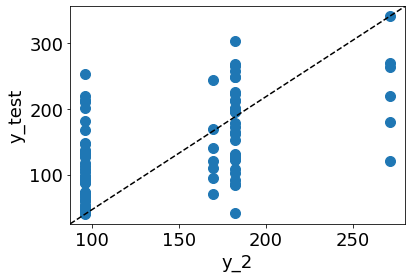

In [ ]:
#Plot the best regression model prediction scatter points 
plt.scatter(y_2, 
            regYtest, 
            label = 'medv')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('y_2')
plt.ylabel('y_test')

In [ ]:
# Finally pick the best max_depth you got
# Use this max_depth, and use cross_val_score and fit your model with k = 10 fold size
# Calculate average scores in kfold
'''
Best max_depth = ?

'''

from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 10)
scores = cross_val_score(regr_2, diabetes.data, diabetes.target,cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.28897364 0.16168834 0.30122639 0.48723453 0.30735793 0.5135879
 0.29810844 0.01757394 0.15153891 0.55875239]
Average cross-validation score: 0.31


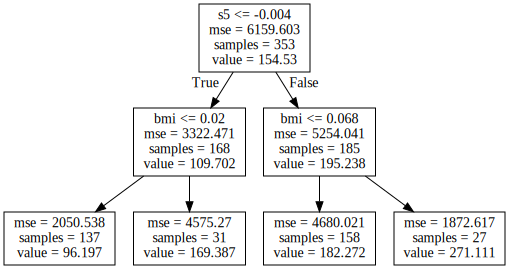

In [ ]:
#Refer to class example code 
#Plot the decision tree with max_depth = 2

import graphviz
from sklearn.tree import export_graphviz

export_graphviz(regr_2,out_file = "diabetes_tree.dot", feature_names = diabetes.feature_names)
with open("diabetes_tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
# Answer the questions: 

'''
1. What is the most important indicator that indicate diabetes?
'''

'''
Your answer goes here: 

BMI seems to be the best idicator for diabetes.


'''

### 4. Decision Tree with Bagging 
---



---

***EXERCISE NO. 4.1 | Score :10***

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

from sklearn.ensemble import BaggingRegressor

# Use BaggingRegressor to fit the training data
# Calculate the mean squared error 

#load BaggingRegressor model and pass n_estimators=20, random_state=1
bagged_regr = BaggingRegressor(n_estimators = 20, random_state = 1)
bagged_regr.fit(regXtrain, regYtrain)
pred = bagged_regr.predict(regXtest)
mean_squared_error(regYtest, pred)

3304.719831460674

Text(0, 0.5, 'y_test')

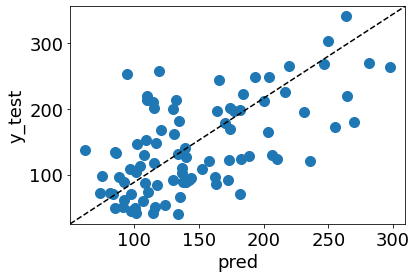

In [ ]:
#Plot the best regression model prediction scatter points 
plt.scatter(pred, 
            regYtest, 
            label = 'medv')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:
# Answer the following questions: 
'''
1. Does Begging improve the MSE(mean squared error) from a single decision tree with best max_depth, and why? 
2. Comparing to the single decision tree scatter plot, what do you observed from the begging decision trees scatter plot?  
'''

'''
Your answer goes here: 
1. Begging improves the MSE, because the error is lower than then single decision tree MSE.

2. The single decision tree is more uniform than the begging decision tree.
'''

### 5. Random Forest 
---



---

***EXERCISE NO. 5.1 | Score :10***

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

from sklearn.ensemble import RandomForestRegressor

# Use RandomForestRegressor to fit the training data
# Calculate the mean squared error 

# load RandomForestRegressor model and pass max_features=6, n_estimater=20, random_state=1
random_forest_regr = RandomForestRegressor(max_features= 6, n_estimators = 20, random_state= 1)
random_forest_regr.fit(regXtrain, regYtrain)
pred = random_forest_regr.predict(regXtest)

mean_squared_error(regYtest, pred)

3096.695421348315

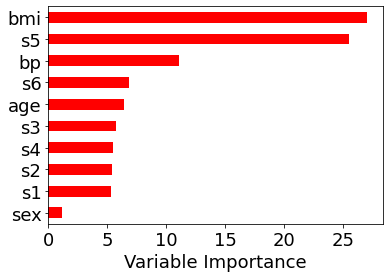

In [ ]:
# Plot the importance rank of each feature in the diabeties dataset 
import pandas as pd
Importance = pd.DataFrame({'Importance':random_forest_regr.feature_importances_*100}, 
                          index = diabetes.feature_names)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
#Answer the following questions: 
'''
1. Does Random Forest improve the MSE(mean squared error) from a single decision tree with best max_depth and Bagging, and why? 
2. What is the most important indicator that indicate diabetes?
'''

'''
Your answer goes here: 

1. Random Forest does improve the MSE because the error is lower than the
max_depth but not Bagging, so the MSE is not improve. 

2. BMI is rhe most important indicator of diabetes.

'''

### 6. Boosting 
---



---

***EXERCISE NO. 6.1 | Score :10***

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor

# Use GradientBoostingRegressor to fit the training data
# Calculate the mean squared error 

# load GradientBoostingRegressor model and pass n_estimators = 500, learning_rate = 0.01, max_depth = 2, random_state = 1
boosted_regr = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 2, random_state = 1)
boosted_regr.fit(regXtrain, regYtrain)
pred = boosted_regr.predict(regXtest)

mean_squared_error(regYtest, pred)

2778.1976500450855

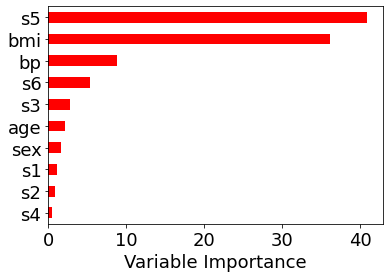

In [ ]:
feature_importance = boosted_regr.feature_importances_*100

rel_imp = pd.Series(feature_importance, 
                    index = diabetes.feature_names).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', 
               color = 'r', )

plt.xlabel('Variable Importance')

plt.gca().legend_ = None

In [ ]:
#Answer the following questions: 
'''
1. Does Boosting improve the MSE(mean squared error) from a single decision tree with best max_depth, Bagging, and Random Forest, and why? 
2. What is the most important indicator that indicate diabetes?
'''

'''
Your answer goes here: 

1. Boosting improves the MSE the most out of max_depth, Bagging, and Random Forest because the MSE is significantly smaller than everyone
else's. 

2. s5 is the most important indicator of diabetes.

'''